In [68]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from scipy.stats import mannwhitneyu

In [69]:
#Importing CREEDs benchmark data files 
gene_perturb=pd.read_csv('../results/gene_pert.csv', sep=',', index_col=0, header=0)
drug_perturb=pd.read_csv('../results/drug_pert.csv', sep=',', index_col=0, header=0)
gene_meta=pd.read_csv('../results/gene_perturb.csv', sep=',', index_col=0, header=0)
drug_meta=pd.read_csv('../results/drug_perturb.csv', sep=',', index_col=0, header=0)

In [70]:
#Importing NicheNet
nn=pd.read_csv('../data/ligand_target_matrix.csv', sep=',', header=0, index_col=0)
lr_network=pd.read_csv('../data/lr_network.csv', sep=',', header=0, index_col=0)

In [71]:
#Importing RIDDEN datasets
RIDDEN_lig=pd.read_csv('../results/consensus_signature_gse92742_trt_lig.csv', header=0, sep=',', index_col=0)
RIDDEN_drugs=pd.read_csv('../results/consensus_signature_trt_drugs.csv', header=0, sep=',', index_col=0)

In [72]:
RIDDEN_lig=RIDDEN_lig.T
RIDDEN_drugs=RIDDEN_drugs.T

In [73]:
drug_perturb.loc['EGFR'].sort_values()

880    -10.317792
881    -10.317792
1387    -8.281932
831     -7.343597
830     -7.343597
          ...    
1369     6.501945
1381     8.281932
1383     8.281932
1382     8.281932
1966    11.758751
Name: EGFR, Length: 387, dtype: float64

In [74]:
similarity_lig=pd.read_csv('../results/drug_pert_gse92742_trt_lig.csv', header=0, sep=',', index_col=0)

In [75]:
similarity_lig.loc['EGFR'].sort_values()

1948   -0.254126
702    -0.236688
703    -0.236688
1554   -0.225637
1043   -0.206412
          ...   
411     0.197472
663     0.198625
401     0.234301
399     0.234301
400     0.234301
Name: EGFR, Length: 387, dtype: float64

In [76]:
similarity_lig.max().sort_values()

1400    0.047793
1291    0.049701
1315    0.061290
946     0.062094
945     0.062094
          ...   
752     0.398662
756     0.398662
1769    0.418491
1772    0.418491
1770    0.418491
Length: 387, dtype: float64

In [158]:
similarity_lig['498']

ADM      -0.089906
AGT       0.000053
ANGPT1   -0.030283
ANGPT2   -0.032238
ANGPT4    0.074505
            ...   
VTN      -0.043738
WNT1     -0.049060
XCL1      0.025847
IL17A    -0.045819
IFNA2    -0.030595
Name: 498, Length: 213, dtype: float64

In [151]:
drug_meta.loc[498]

cell_type                                             PC-3 cells
ctrl_ids                                   GSM1286084|GSM1286089
curator                                           MicrotaskManic
drug_name                                              Gefitinib
drugbank_id                                              DB00317
geo_id                                                  GSE53180
organism                                                   human
pert_ids                                   GSM1286087|GSM1286092
platform                                                 GPL4133
pubchem_cid                                               123631
smiles         COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OC...
version                                                        1
Target                                                      EGFR
Target_type                                           antagonist
sign                                                          -1
Name: 498, dtype: object

In [44]:
#similarity_lig

In [79]:
true_matrix = pd.DataFrame(0, index=similarity_lig.index, columns=similarity_lig.columns)
for sample in true_matrix.columns:
    target = drug_meta.loc[int(sample), 'Target']
    fil = lr_network['to'] == target
    ligands = lr_network['from'][fil].unique()
    ligands = list(set(ligands) & set(true_matrix.index))
    true_matrix.loc[ligands, sample] = 1
    if target in true_matrix.index:
        true_matrix.loc[target, sample] = 1

In [161]:
true_matrix.loc['EGFR'].sort_values()

1416    0
1907    0
1239    0
692     0
1434    0
       ..
1050    1
1044    1
498     1
1048    1
1038    1
Name: EGFR, Length: 387, dtype: int64

In [81]:
true_matrix.at['EGFR','1050']

1

In [126]:
common_genes = list(set(drug_perturb.index) & set(RIDDEN_lig.index))
len(common_genes)

648

In [127]:
drug_perturb_common=drug_perturb.loc[common_genes]
RIDDEN_lig_common=RIDDEN_lig.loc[common_genes]

In [125]:
RIDDEN_lig['EGFR']

DDR1      0.362942
PAX8     -0.132355
RPS5      0.167028
ABCF1    -0.030130
SPAG7    -0.041959
            ...   
PPARD     0.171348
GNA11     0.322185
WDTC1     0.618446
PLSCR3    0.134190
NPEPL1    0.087430
Name: EGFR, Length: 978, dtype: float64

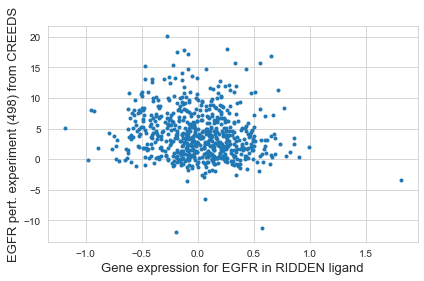

In [170]:
plt.plot(RIDDEN_lig_common['EGFR'].values, drug_perturb_common['498'].values, '.' )
#plt.title('Correlation of the 2 genes', size=15)
plt.xlabel('Gene expression for EGFR in RIDDEN ligand', size=13)
plt.ylabel('EGFR pert. experiment (498) from CREEDS', size=13)
plt.tight_layout()
plt.savefig('../pictures/corr1')

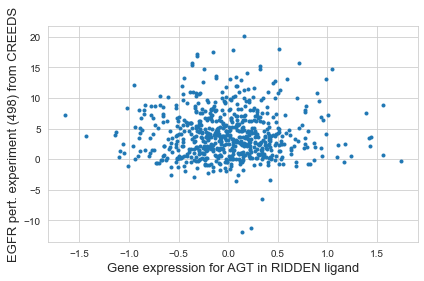

In [172]:
plt.plot(RIDDEN_lig_common['AGT'].values, drug_perturb_common['498'].values, '.' )
#plt.title('Correlation of the 2 genes', size=15)
plt.xlabel('Gene expression for AGT in RIDDEN ligand', size=13)
plt.ylabel('EGFR pert. experiment (498) from CREEDS', size=13)
plt.tight_layout()
plt.savefig('../pictures/corr2')

In [86]:
RIDDEN_lig

,RIDDEN_ADM,RIDDEN_AGT,RIDDEN_ANGPT1,RIDDEN_ANGPT2,RIDDEN_ANGPT4,RIDDEN_APLN,RIDDEN_APOE,RIDDEN_AREG,RIDDEN_ARTN,RIDDEN_AVP,...,RIDDEN_UTS2,RIDDEN_VEGFA,RIDDEN_VEGFB,RIDDEN_VEGFC,RIDDEN_VIP,RIDDEN_VTN,RIDDEN_WNT1,RIDDEN_XCL1,RIDDEN_IL17A,RIDDEN_IFNA2
DDR1,-0.311746,0.328147,-0.290770,0.681153,-0.105004,0.290904,0.211712,0.053174,0.187789,0.279418,...,0.396761,0.413950,0.108714,-0.006694,1.221195,0.391628,0.344205,0.302420,0.156113,0.122696
PAX8,-0.598979,0.187768,0.331472,-0.265093,0.168645,-0.044158,0.551838,0.199567,-0.004982,0.174167,...,0.390771,-0.283967,0.124826,0.015059,0.107968,-0.014858,0.070973,-0.108537,0.064737,-0.582232
RPS5,0.279604,-0.214431,0.041328,0.158823,-0.413267,-0.199525,-0.293629,0.110433,0.317544,-0.239516,...,-0.114810,-0.241148,0.117850,0.020890,-0.232517,0.369823,0.627918,0.206093,-0.158104,0.574131
ABCF1,-0.713548,0.387740,-0.156881,0.164295,-0.507766,0.168712,-0.117965,-0.442779,-0.316651,-0.049654,...,-0.104671,0.133034,-0.736458,-0.150523,0.052420,0.382225,-0.388378,-0.119838,-0.149376,-0.702036
SPAG7,-1.766061,0.104206,-0.040080,0.143002,-0.695529,0.048788,0.073540,0.219238,-0.037445,-0.031229,...,-0.347993,0.401141,-0.317175,-0.096045,0.480370,0.046199,-0.360219,-0.773374,0.054229,-0.110045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPARD,1.519913,0.261729,-0.299798,0.517119,0.991168,0.089614,-0.252873,0.308586,0.649643,0.046629,...,0.900275,0.874536,0.194473,0.491853,1.223753,0.286939,-0.273493,0.187500,-0.287749,0.391146
GNA11,0.853947,0.165706,0.432410,0.245710,-0.241819,0.038231,0.445176,0.012231,0.486551,0.218238,...,0.494126,-0.186129,0.120637,0.128140,-0.155378,0.385034,0.144216,0.064210,0.107386,0.564264
WDTC1,0.960275,0.208520,0.373030,-0.019295,0.144145,-0.117144,0.324836,0.174577,0.450254,0.565578,...,0.359430,-0.615611,0.014892,0.051096,0.058617,-0.009999,0.080041,-0.465301,0.520271,-0.144103
PLSCR3,-0.026827,-0.264325,0.701792,0.243718,-0.072021,-0.006697,0.201897,0.380245,-0.057483,-0.117324,...,0.747330,0.008879,0.440053,0.329917,0.255077,-0.289167,0.283766,0.610398,0.027669,0.255166


In [107]:
drug_meta

,cell_type,ctrl_ids,curator,drug_name,drugbank_id,geo_id,organism,pert_ids,platform,pubchem_cid,smiles,version,Target,Target_type,sign
0,vastus lateralis muscle,GSM801199|GSM801201|GSM801202|GSM801204|GSM801...,MicrotaskManic,Resveratrol,DB02709,GSE32357,human,GSM801198|GSM801200|GSM801203|GSM801205|GSM801...,GPL11532,NaN,Oc1ccc(cc1)/C=C/c1cc(O)cc(c1)O,1.0,AHR,NaN,0
1,vastus lateralis muscle,GSM801199|GSM801201|GSM801202|GSM801204|GSM801...,MicrotaskManic,Resveratrol,DB02709,GSE32357,human,GSM801198|GSM801200|GSM801203|GSM801205|GSM801...,GPL11532,NaN,Oc1ccc(cc1)/C=C/c1cc(O)cc(c1)O,1.0,ESR1,NaN,0
2,vastus lateralis muscle,GSM801199|GSM801201|GSM801202|GSM801204|GSM801...,MicrotaskManic,Resveratrol,DB02709,GSE32357,human,GSM801198|GSM801200|GSM801203|GSM801205|GSM801...,GPL11532,NaN,Oc1ccc(cc1)/C=C/c1cc(O)cc(c1)O,1.0,MTNR1A,NaN,0
3,vastus lateralis muscle,GSM801199|GSM801201|GSM801202|GSM801204|GSM801...,MicrotaskManic,Resveratrol,DB02709,GSE32357,human,GSM801198|GSM801200|GSM801203|GSM801205|GSM801...,GPL11532,NaN,Oc1ccc(cc1)/C=C/c1cc(O)cc(c1)O,1.0,MTNR1B,NaN,0
4,vastus lateralis muscle,GSM801199|GSM801201|GSM801202|GSM801204|GSM801...,MicrotaskManic,Resveratrol,DB02709,GSE32357,human,GSM801198|GSM801200|GSM801203|GSM801205|GSM801...,GPL11532,NaN,Oc1ccc(cc1)/C=C/c1cc(O)cc(c1)O,1.0,NR1I2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,T47D breast cancer cells,GSM1649569|GSM1649573|GSM1649577,cadimo,Promegestone,NaN,GSE67561,human,GSM1649570|GSM1649574|GSM1649578,GPL10558,36709.0,CCC(=O)C1(CCC2C1(CCC3=C4CCC(=O)C=C4CCC23)C)C,1.0,PGR,agonist,1
1967,Skeletal muscles (of HIV-infected males),GSM113921|GSM115323|GSM115325|GSM115326|GSM115...,cadimo,Testosterone,DB00624,GSE5106,human,GSM115332|GSM115333|GSM115334|GSM115335|GSM115...,GPL571,6013.0,CC12CCC3C(C1CCC2O)CCC4=CC(=O)CCC34C,1.0,AR,agonist,1
1968,Skeletal muscles (of HIV-infected males),GSM113921|GSM115323|GSM115325|GSM115326|GSM115...,cadimo,Testosterone,DB00624,GSE5106,human,GSM115332|GSM115333|GSM115334|GSM115335|GSM115...,GPL571,6013.0,CC12CCC3C(C1CCC2O)CCC4=CC(=O)CCC34C,1.0,ESR1,antagonist,-1
1969,Skeletal muscles (of HIV-infected males),GSM113921|GSM115323|GSM115325|GSM115326|GSM115...,cadimo,Testosterone,DB00624,GSE5106,human,GSM115332|GSM115333|GSM115334|GSM115335|GSM115...,GPL571,6013.0,CC12CCC3C(C1CCC2O)CCC4=CC(=O)CCC34C,1.0,NR3C2,NaN,0
